In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown, IFrame
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns
%matplotlib inline


In [3]:
with open("../results_cpp_benchmarker/e2e_results/image_driver_1/cpp-aws-p2-1-inception-1-resnet-3-ksvm-1-logreg-180324_170634.json", "r") as f:
    results = json.load(f)

In [7]:
summary = results["throughput_results"]["summary_metrics"]

In [11]:
for s in summary:
    print(s["client_p99_lats"]["e2e"])

233.489
228.639
228.184
229.969
230.143
230.046
227.997
228.941
231.44
230.309
228.777
228.561
227.495
228.516
228.398
228.62
228.076
230.156
230.513
227.139
228.649
229.534
230.486
228.422
228.743
227.97
227.997
231.402
228.494
227.622


In [24]:
int(list([0]["data_lists"][0]['tf-log-reg:prediction_latencies']["items"][0].values())[0])

1626

In [31]:
def extract_all_latencies(results_json):
    client_metrics = results_json["throughput_results"]["client_metrics"]
    latencies = []
    key_name = "e2e:prediction_latencies"
    for trial in client_metrics:
        for l in trial["data_lists"]:
            if list(l.keys())[0] == key_name:
                cur_lats = [float(list(i.values())[0]) for i in l[key_name]["items"]]
                latencies.extend(cur_lats)
    all_lats = np.array(latencies).flatten() / 1000.0 / 1000.0  # Convert micros to secs
    return all_lats
    
lats = extract_all_latencies(results)

In [40]:
print(np.mean(lats))
print(len(lats))

print("P99: " + str(np.percentile(lats[:40000], 99)))
print("MAX: " + str(np.max(lats)))

0.170034988315
59990
P99: 0.229392
MAX: 0.277134


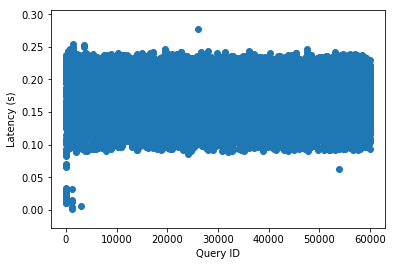

In [37]:
plt.scatter(range(len(lats)), lats)
plt.ylabel("Latency (s)")
plt.xlabel("Query ID")
plt.show()